In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

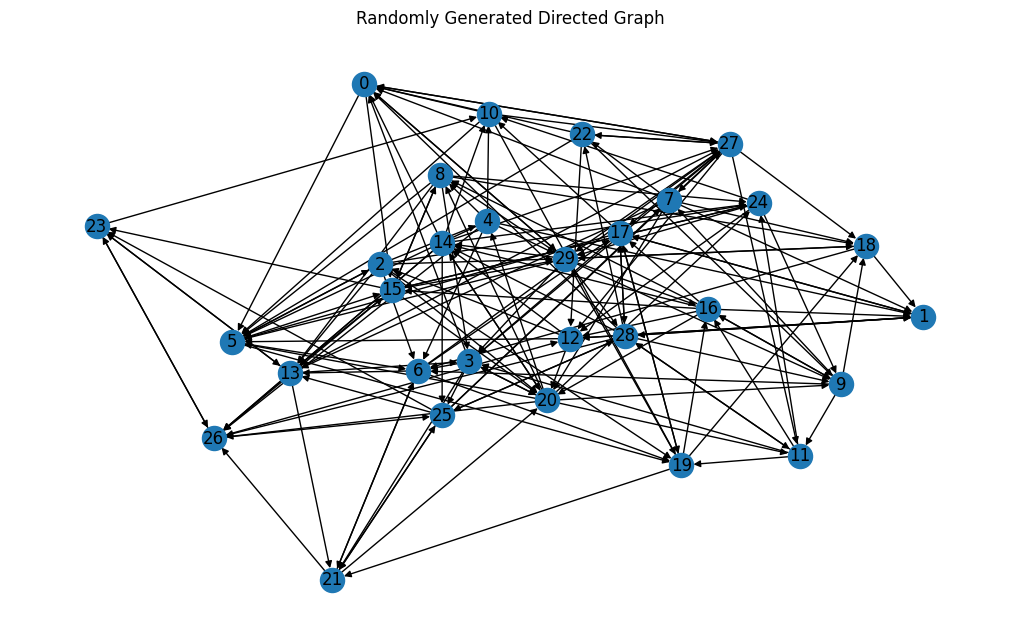

In [19]:
# Construct Graph
num_nodes = 30
edge_prob = 0.2
G = nx.gnp_random_graph(num_nodes, edge_prob, directed=True)

# Visualize
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True)
plt.title("Randomly Generated Directed Graph")
plt.show()

In [20]:
# Custom PageRank Implementation
def custom_pagerank(G, alpha=0.85, tolerance=1.0e-6, max_iter=100):
  N = len(G)
  if N == 0:
    return {}

  # Initialize PageRank values
  pagerank = {node: 1 / N for node in G}
  new_pagerank = pagerank.copy()

  for iter in range(max_iter):
    for node in G:
      rank_sum = sum(pagerank[neighbor] / len(G[neighbor]) for neighbor in G.predecessors(node))
      new_pagerank[node] = (1 - alpha) / N + alpha * rank_sum

    # Check for convergence
    diff = sum(abs(new_pagerank[n] - pagerank[n]) for n in G)
    if diff < tolerance:
      print(f"Converged after {iter} iterations.")
      break
    pagerank = new_pagerank.copy()

  return pagerank

# Compute PageRank for generated graph
pagerank_scores = custom_pagerank(G)

# Display PageRank scores
print("PageRank Scores:")
for node, score in sorted(pagerank_scores.items(), key=lambda x: -x[1]):
  print(f"Node {node}: {score:.6f}")

Converged after 12 iterations.
PageRank Scores:
Node 5: 0.049551
Node 27: 0.048776
Node 29: 0.048517
Node 6: 0.045417
Node 13: 0.043330
Node 15: 0.042465
Node 19: 0.041167
Node 17: 0.041101
Node 20: 0.040612
Node 26: 0.040163
Node 12: 0.039032
Node 0: 0.036996
Node 1: 0.036546
Node 21: 0.036380
Node 28: 0.033989
Node 3: 0.033622
Node 18: 0.032327
Node 25: 0.031990
Node 23: 0.031449
Node 10: 0.028429
Node 24: 0.026974
Node 9: 0.026588
Node 14: 0.025898
Node 16: 0.024798
Node 8: 0.023427
Node 2: 0.022165
Node 11: 0.021748
Node 7: 0.019234
Node 22: 0.016117
Node 4: 0.011191


In [21]:
# Compute PageRank scores using NetworkX
pagerank_scores_nx = nx.pagerank(G, alpha=0.85)

# Display NetworkX PageRank scores
print("Comparison of PageRank Scores:")
for node in sorted(G.nodes()):
  print(f"Node {node}: NetworkX Score: {pagerank_scores_nx[node]:.6f}")

# Compute correlation coefficient
custom_scores = np.array([pagerank_scores[n] for n in G.nodes()])
nx_scores = np.array([pagerank_scores_nx[n] for n in G.nodes()])
correlation = np.corrcoef(custom_scores, nx_scores)[0, 1]

print(f"Correlation Coefficient between Custom and NetworkX PageRank: {correlation:.6f}")


Comparison of PageRank Scores:
Node 0: NetworkX Score: 0.036995
Node 1: NetworkX Score: 0.036547
Node 2: NetworkX Score: 0.022165
Node 3: NetworkX Score: 0.033623
Node 4: NetworkX Score: 0.011191
Node 5: NetworkX Score: 0.049551
Node 6: NetworkX Score: 0.045417
Node 7: NetworkX Score: 0.019234
Node 8: NetworkX Score: 0.023427
Node 9: NetworkX Score: 0.026588
Node 10: NetworkX Score: 0.028429
Node 11: NetworkX Score: 0.021748
Node 12: NetworkX Score: 0.039032
Node 13: NetworkX Score: 0.043329
Node 14: NetworkX Score: 0.025898
Node 15: NetworkX Score: 0.042465
Node 16: NetworkX Score: 0.024798
Node 17: NetworkX Score: 0.041102
Node 18: NetworkX Score: 0.032327
Node 19: NetworkX Score: 0.041167
Node 20: NetworkX Score: 0.040612
Node 21: NetworkX Score: 0.036380
Node 22: NetworkX Score: 0.016118
Node 23: NetworkX Score: 0.031448
Node 24: NetworkX Score: 0.026974
Node 25: NetworkX Score: 0.031990
Node 26: NetworkX Score: 0.040163
Node 27: NetworkX Score: 0.048776
Node 28: NetworkX Score: 0

Converged after 8 iterations.
Converged after 11 iterations.
Converged after 12 iterations.
Converged after 14 iterations.


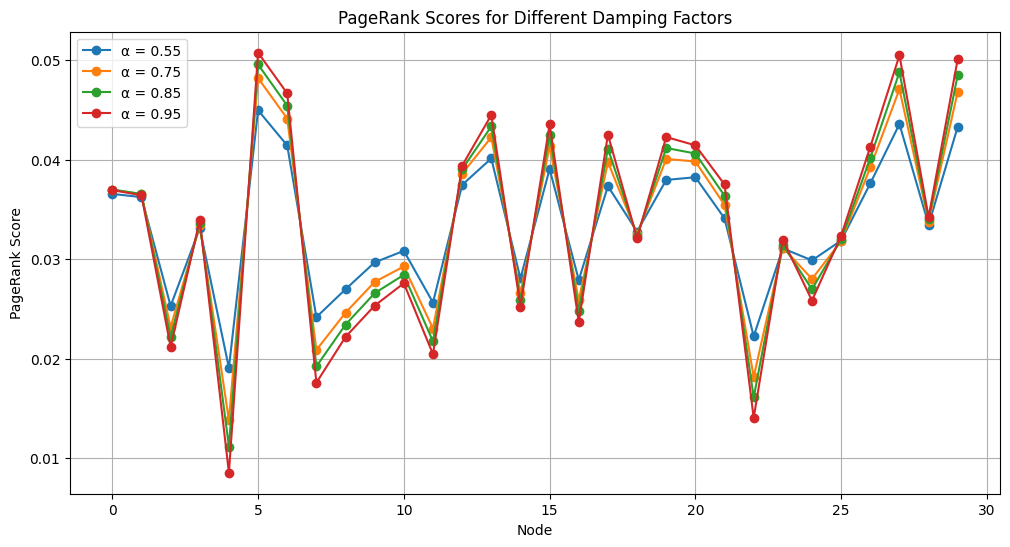

In [25]:
# Experiment with different damping factors
damping_factors = [0.55, 0.75, 0.85, 0.95]
pagerank_results = {}

for alpha in damping_factors:
  pagerank_results[alpha] = custom_pagerank(G, alpha=alpha)

# Plot PageRank scores for different damping factors
plt.figure(figsize=(12, 6))
for alpha, scores in pagerank_results.items():
  sorted_nodes = sorted(scores.keys())
  sorted_scores = [scores[node] for node in sorted_nodes]
  plt.plot(sorted_nodes, sorted_scores, marker='o', linestyle='-', label=f'a = {alpha}')

plt.xlabel("Node")
plt.ylabel("PageRank Score")
plt.title("PageRank Scores for Different Damping Factors")
plt.legend()
plt.grid()
plt.show()

The custom PageRank implementation produced results nearly identical to NetworkX, with a correlation of 1. Both methods converged to the same distribution. The damping factor had a clear impact on scores, lower values like 0.55 made scores more uniform because teleportation played a bigger role and reduced the dominance of highly connected nodes. Higher values like 0.95 resulted in more extreme scores, where well-connected nodes gained more influence. The standard 0.85 maintained a balance between these effects. Convergence speed was also affected, with lower damping factors leading to faster convergence (8 iterations) and higher alpha requiring more iterations (14) this was a result of less frequent teleportation in models with higher damping factors.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [12]:
# Define transformations
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False)

print(f"Training Samples: {len(trainset)} | Test Samples: {len(testset)}")

Training Samples: 60000 | Test Samples: 10000


In [13]:
class MNIST_CNN(nn.Module):
  def __init__(self):
    super(MNIST_CNN, self).__init__()
    # Convolutional layers
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)

    # Fully connected layers
    self.fc1 = nn.Linear(64 * 4 * 4, 256)  # Flattened output from conv layers into a single vector
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool(nn.ReLU()(x))
    x = self.conv2(x)
    x = self.pool(nn.ReLU()(x))
    x = x.view(-1, 64 * 4 * 4)
    x = nn.ReLU()(self.fc1(x))
    x = nn.ReLU()(self.fc2(x))
    x = self.fc3(x)  # CrossEntropyLoss applies Softmax transformation
    return x

# Initialize model, loss, and optimizer
model = MNIST_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)

MNIST_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [14]:
# Using GPU on google collab for development
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

num_epochs = 2
batch_print_interval = 2000

for epoch in range(num_epochs):
  running_loss = 0.0

  for i, (inputs, labels) in enumerate(trainloader, 0):
    inputs, labels = inputs.to(device), labels.to(device)  # Moves data to GPU

    optimizer.zero_grad() # Clear existing gradients

    outputs = model(inputs) # Forward Pass

    loss = criterion(outputs, labels) # Calculate Loss

    loss.backward() # Backward Pass

    optimizer.step() # Update Parameters

    # Print avg loss every 2000 batches
    running_loss += loss.item()
    if (i + 1) % batch_print_interval == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {running_loss / batch_print_interval:.4f}")
      running_loss = 0.0

cuda
Epoch [1/2], Batch [2000], Loss: 0.2245
Epoch [1/2], Batch [4000], Loss: 0.0917
Epoch [1/2], Batch [6000], Loss: 0.0788
Epoch [2/2], Batch [2000], Loss: 0.0547
Epoch [2/2], Batch [4000], Loss: 0.0596
Epoch [2/2], Batch [6000], Loss: 0.0556
Training complete!


In [15]:
correct = 0
total = 0

model.eval() # Sets to eval mode

with torch.no_grad(): # Disables gradients
  for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

# Compute accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 98.65%
